# Data Science project

####  _Impact of traffic, prediction of accident and its severity_ 

Data source- Collisions—All Years

All collisions provided by SPD and recorded by Traffic Records. SDOT Traffic Management Division, Traffic Records Group

## Table of contents:

     - Business Problem
     - Data
     - Methodology
     - Results and scope
     - Discussion and Conclusion


## Business Problem

In this project, we seek to determine the Impact of traffic, prediction of accident and the Severity of Car Crash Collisions using data analysis and machine learning models. All collisions are provided by Seattle Police Dept. and recorded by Traffic Records. SDOT Traffic Management Division, Traffic Records Group

Determining the Severity of a Car Crash and the conditions in which it happened could be useful for car manufactures when desgining what kind of safety features a car may have, or be useful for actuaries when assesing insurance risk. Introduction of intelligent softwares and hardwares like EBD, ABS, ADAD or etc. can tackle the conditions and provide more safety to passengers. It's not only useful to the manufacturers but the traffic department as well. The data collected and analysed can be used to predict the conditions and recommend people to drive when all the conditions are favorable and crash is not likely to happen.

For the same reason, we will focus more on general features surrounding the car crash such as: Weather, Speeding, Collision Type, and State Codes to name a few.

## Data


In [2]:
import pandas as pd
import numpy as np
import csv

In [3]:
col = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
col.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


| Columns to be dropped  | Reason |
| ------------- | ------------- |
| Location (X & Y) and related columns| Irrelevant to the analysis  |
| Columns with report number, status, and keys  | We already have OBJECTID for identification  |
| SDOT_COLCODE and ST_COLDESC  | These columns focuses on the type of crash and too much specific information can result in outliers and overfitting  |
| HITPARKEDCAR | COLLISIONTYPE covers this variable and above two variables as well  |
| JUNCTIONTYPE  | Provided with column ADDRTYPE which serves the same purpose |
| TIME | Columns like LIGHTCOND perfectly indicates the visibility and light conditions |

**Data review:** <br>
*Columns dropped and justification* <br>

<br>

* Location doesn't matter to our analysis, so we can drop the X and Y columns as well as columns pertaining to specific locations. 


* We can also drop the columns that indicate report number, status, and keys since they are only there to identify the unique id of the crash.


* COLLISIONTYPE indicates the type of collision that has occured, this is less specific than the SDOT_COLCODE or ST_COLCODE columns, but essentially contains the same information. COLLISIONTYPE would be better for us to use as we are looking to create a general model, and should give us more accurate results than if we use the SDOT_COLCODE or ST_COLCODE which are more specific and could have outliers which could skew our model. SDOT_COLCODE and ST_COLCODE are similar as well, they are just codes used to describe the situation. For that reason we drop SDOT_COLCODE and SDOT_COLDESC as they indicate similar situations to ST_COLCODE and ST_COLDESC which we drop as well.


* ST_COLCODE and ST_COLDESC are the same thing, ST_COLDESC is the description for the categorical variable ST_COLCODE, therefore, we only need to keep one. SEVERITYCODE and SEVERITYDESC act in the same manner as well. COLLISIONTYPE is also a categorical variable that covers HITPARKEDCAR, therefore we can eliminate HITPARKEDCAR.


* We can also drop the time columns, since the LIGHTCOND column is already a good indicator for the time of the crash and visibility conditions. Other columns like the WEATHER column also are indicitive of seasonal conditions.


* Finally, we can drop columns that are essentially related, JUNCTIONTYPE and ADDRTYPE basically say the same things. So we'll just keep one, ADDRTYPE for its ease of use.





In [5]:
# Drop columns by index. These columns are latitude and logitute coordinates, as well as unique crash identifiers
col.drop(col.iloc[:, 1:7], inplace = True, axis = 1)

# Dropping columns with specific Location Data and their descriptions
col.drop(['INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEGLANEKEY','CROSSWALKKEY'], inplace = True, axis = 1)

# Dropping duplicated column
col.drop(['SEVERITYCODE.1'], inplace = True, axis = 1)

# Drop Date and time columns
col.drop(['INCDATE','INCDTTM'], inplace = True, axis = 1)

# Drop another unique identifier column
col.drop(['SDOTCOLNUM'], inplace = True, axis = 1)

# Drop essentially similar columns
col.drop(['JUNCTIONTYPE','SDOT_COLCODE','SDOT_COLDESC','ST_COLCODE','ST_COLDESC','SEVERITYDESC','HITPARKEDCAR'], inplace = True, axis = 1)

col.head()

,SEVERITYCODE,STATUS,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
0,2,Matched,Intersection,Angles,2,0,0,2,NaN,N,Overcast,Wet,Daylight,NaN,NaN
1,1,Matched,Block,Sideswipe,2,0,0,2,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN
2,1,Matched,Block,Parked Car,4,0,0,3,NaN,0,Overcast,Dry,Daylight,NaN,NaN
3,1,Matched,Block,Other,3,0,0,3,NaN,N,Clear,Dry,Daylight,NaN,NaN
4,2,Matched,Intersection,Angles,2,0,0,2,NaN,0,Raining,Wet,Daylight,NaN,NaN


In [6]:
col.count()

SEVERITYCODE      194673
STATUS            194673
ADDRTYPE          192747
COLLISIONTYPE     189769
PERSONCOUNT       194673
PEDCOUNT          194673
PEDCYLCOUNT       194673
VEHCOUNT          194673
INATTENTIONIND     29805
UNDERINFL         189789
WEATHER           189592
ROADCOND          189661
LIGHTCOND         189503
PEDROWNOTGRNT       4667
SPEEDING            9333
dtype: int64

In [7]:
col.columns

Index(['SEVERITYCODE', 'STATUS', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INATTENTIONIND', 'UNDERINFL',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING'],
      dtype='object')

#### We will remove the empty data to increase the accuracy of our model

The STATUS column indicates if a collision was matched to a party or not. Generally a STATUS of 'Unmatched' will be the reason why there are NaN values, as not enough information could be gathered

In [8]:
# Sum of NaN's in each column
col.isnull().sum()

SEVERITYCODE           0
STATUS                 0
ADDRTYPE            1926
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SPEEDING          185340
dtype: int64

In [9]:
col['STATUS'].value_counts()

Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64

In [10]:
# Selecting Rows Where STATUS has a 'Matched' Value and dropping STATUS as a column
col = col.loc[col['STATUS'] == 'Matched']
col.drop(['STATUS'], inplace = True, axis = 1)

Let's start reducing the NaN values in all columns. Starting with finding the total of Null values.

In [11]:
col.isnull().sum()

SEVERITYCODE           0
ADDRTYPE            1817
COLLISIONTYPE         21
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INATTENTIONIND    159981
UNDERINFL              0
WEATHER              197
ROADCOND             128
LIGHTCOND            286
PEDROWNOTGRNT     185119
SPEEDING          180453
dtype: int64

In [12]:
col['ADDRTYPE'].value_counts(dropna = False)

Block           123663
Intersection     63559
NaN               1817
Alley              747
Name: ADDRTYPE, dtype: int64

In [13]:
col['COLLISIONTYPE'].value_counts(dropna = False)

Parked Car    47986
Angles        34674
Rear Ended    34089
Other         23703
Sideswipe     18608
Left Turn     13703
Pedestrian     6607
Cycles         5415
Right Turn     2956
Head On        2024
NaN              21
Name: COLLISIONTYPE, dtype: int64

In [14]:
col['INATTENTIONIND'].value_counts(dropna = False)

NaN    159981
Y       29805
Name: INATTENTIONIND, dtype: int64

In [15]:
col['WEATHER'].value_counts(dropna = False)

Clear                       111134
Raining                      33144
Overcast                     27713
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
NaN                            197
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [16]:
col['ROADCOND'].value_counts(dropna = False)

Dry               124508
Wet                47473
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
NaN                  128
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [17]:
col['LIGHTCOND'].value_counts(dropna = False)

Daylight                    116135
Dark - Street Lights On      48506
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
NaN                            286
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [18]:
#Let's group the NaN values as Unknown. For the LIGHTCOND column, Group Dark No Street Lights and Dark Street Lights off as the same.
col['ADDRTYPE'].fillna('Other', inplace = True)
col['COLLISIONTYPE'].fillna('Other', inplace = True)
col['WEATHER'].fillna('Unknown', inplace = True)
col['ROADCOND'].fillna('Unknown', inplace = True)
col['LIGHTCOND'].fillna('Unknown', inplace = True)

In [19]:
#Since the values 'Unknown lighting' and 'No Street lights' are similar, we can group these as same.
col['LIGHTCOND'].replace({"Dark - Unknown Lighting": "Dark - No Street Lights", "Dark - Street Lights Off": "Dark - No Street Lights"}, inplace=True)

In [20]:
# To sort the weather conditions for a better view of what conditions affect severity of crash we will filter out the unknown values.
col = col.loc[col['WEATHER'] != 'Unknown']
col = col.loc[col['ROADCOND'] != 'Unknown']
col = col.loc[col['LIGHTCOND'] != 'Unknown']

In [21]:
col['PEDROWNOTGRNT'].value_counts(dropna = False)

NaN    166016
Y        4491
Name: PEDROWNOTGRNT, dtype: int64

In [22]:
col['SPEEDING'].value_counts(dropna = False)


NaN    161364
Y        9143
Name: SPEEDING, dtype: int64

In [23]:
col['INATTENTIONIND'].value_counts(dropna = False)

NaN    141896
Y       28611
Name: INATTENTIONIND, dtype: int64

In [24]:
#Replacing NaN values with N as they will be used as an indicator

col['PEDROWNOTGRNT'].fillna('N', inplace = True)
col['SPEEDING'].fillna('N', inplace = True)
col['INATTENTIONIND'].fillna('N', inplace = True)

In [25]:
# And we need to do the same in Underinfl column as they are also in form of boolean value
col['UNDERINFL'].replace({"0": "N", "1": "Y"}, inplace=True)
col.isnull().sum()

SEVERITYCODE      0
ADDRTYPE          0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SPEEDING          0
dtype: int64

In [26]:
# After all the data formatting we'll get the following table

col.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
0,2,Intersection,Angles,2,0,0,2,N,N,Overcast,Wet,Daylight,N,N
1,1,Block,Sideswipe,2,0,0,2,N,N,Raining,Wet,Dark - Street Lights On,N,N
2,1,Block,Parked Car,4,0,0,3,N,N,Overcast,Dry,Daylight,N,N
3,1,Block,Other,3,0,0,3,N,N,Clear,Dry,Daylight,N,N
4,2,Intersection,Angles,2,0,0,2,N,N,Raining,Wet,Daylight,N,N


In [27]:
# Now let's work on the data types to simplify further actions with data

col.dtypes

SEVERITYCODE       int64
ADDRTYPE          object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
INATTENTIONIND    object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
PEDROWNOTGRNT     object
SPEEDING          object
dtype: object

In [28]:
# Let's convert the dtype to categories to simplify the data analysis
# Converting necessary columns to category type
categories = ['SEVERITYCODE','ADDRTYPE','COLLISIONTYPE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING']
for i in categories:
    col[i] = col[i].astype('category')

col.dtypes

SEVERITYCODE      category
ADDRTYPE          category
COLLISIONTYPE     category
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INATTENTIONIND    category
UNDERINFL         category
WEATHER           category
ROADCOND          category
LIGHTCOND         category
PEDROWNOTGRNT     category
SPEEDING          category
dtype: object

#### Let's do some Exploratory Data Analysis

In [29]:
import matplotlib as mplt
import matplotlib.pyplot as plt

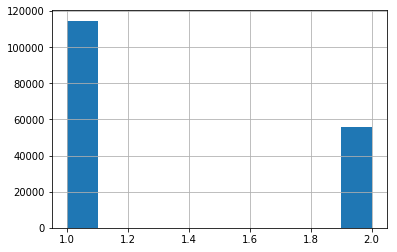

In [30]:
col['SEVERITYCODE'].hist()

In [ ]:
col['COLLISIONTYPE'].hist()

In [ ]:
col['ADDRTYPE'].hist()